In [2]:
import pandas as pd
import sklearn as sns

data = pd.read_csv("AMBUJACEM_minute.csv")
data.head()

,date,open,high,low,close,volume
0,2015-02-02 09:15:00,250.00,250.00,248.45,249.35,9534
1,2015-02-02 09:16:00,249.35,249.35,248.30,248.30,3188
2,2015-02-02 09:17:00,248.30,248.30,247.75,247.95,3179
3,2015-02-02 09:18:00,248.00,248.00,247.60,247.80,4980
4,2015-02-02 09:19:00,247.80,247.90,247.65,247.80,1986


In [3]:
data.describe()

,open,high,low,close,volume
count,969527.000000,969527.000000,969527.000000,969527.000000,9.695270e+05
mean,328.701052,328.902438,328.491417,328.699286,1.122336e+04
std,138.446261,138.530920,138.353654,138.445062,4.093564e+04
min,136.900000,137.200000,136.550000,136.800000,0.000000e+00
25%,219.000000,219.100000,218.850000,219.000000,1.652000e+03
50%,263.000000,263.200000,262.900000,263.000000,4.192000e+03
75%,419.100000,419.300000,418.900000,419.100000,1.034300e+04
max,706.000000,706.950000,705.150000,706.000000,1.488644e+07


In [4]:
#data loading and preparation

from sklearn.model_selection import train_test_split
import numpy as np
x= np.array(data['open'],data['close']).reshape(-1,1)
y = np.array(data['high'], data['low']).reshape(-1,1)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3, shuffle=False)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)

mean squared error: 0.19
coefficient of determination:1.00


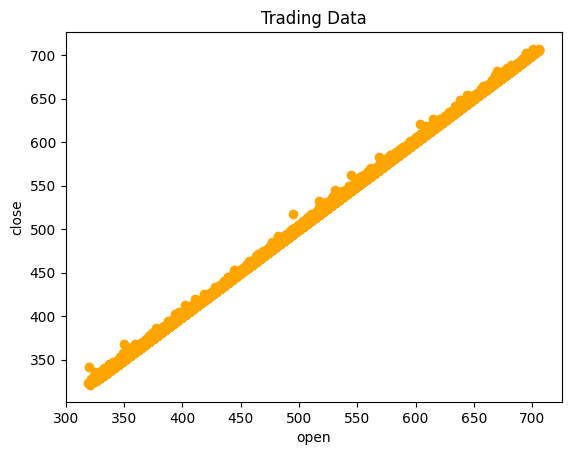

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
y_pred = reg.predict(x_test)

print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"coefficient of determination:{r2_score(y_test,y_pred):.2f}")
# Plot outputs
plt.scatter(x_test, y_test, color='orange')
plt.title('Trading Data')
plt.xlabel('open')
plt.ylabel('close')
plt.show()
